# Mountain Lee Waves

### Linear Model

Single equation for vertical velocity is
## $$ \frac{\partial^2w}{\partial x^2} + \frac{\partial^2w}{\partial z^2} + \ell^2 w= 0$$

where x is the horizontal coordinate perpendicular to the ridgeline, z is the vertical component, and

## $$ \ell^2 = \frac{N^2}{U^2} - \frac{1}{U} \frac{d^2 U}{dz^2} $$

is the Scorer parameter where U(z) is the speed of basic state flow and N(z) is the buoyancy frequency. This can be defined as:

## $$ N^2 = \frac{g}{\theta_0} \frac{d\bar\theta}{dz} $$

Where \bar theta(z) is the basic-state potential temperature and theta_0 is a constant reference potential temperature

Lower BC:
In order to assure the physical relevance of mathematical solutions to (1) in the infinitely deep atmosphere, those solutions must satisfy one of two possible conditions: either (i) the perturbation energy density must approach zero as z → ∞, or (ii) if the perturbation energy density is finite as z → ∞, then the perturbation energy flux associated with each individual vertically propagating mode must be upward.

## $$ w(x, z) = \bar w_1(z)\cos kx + \bar w_2 (z) \sin kx $$

In [141]:
import numpy as np
import matplotlib.pyplot as plt

### Define Boundaries

In [215]:
dx = 1*500
xf = 100*1000
x = np.arange(0, xf+1, dx)
#print(x)

dz = 1*500
zf = 9*1000
z = np.arange(0, zf+1, dz)
#print(z)

### Energy Dissipation with Height

In [229]:
U = 15 #m/s^2
N = 0.1 #1/s
l = N / U
print(l)
k = 0.1
#v = np.sqrt(l**2 - k**2)
mu = np.sqrt(k**2 - l**2)
print(mu)

h0 = 100

0.006666666666666667
0.09977753031397178


In [230]:
# The vertical velocity satisfying (1) and the upper and lower boundary conditions is:
def omega(x, z):
    return U * h0 * k * np.exp(-mu*z/100) * np.cos(k*x)

In [231]:
omegalist = []
for i in np.arange(len(z)):
    zz = z[i]
    #print(f'Z -------- Calculating at {zz/1000:0.2}km height')
    for j in np.arange(len(x)):
        xx = x[j]
        #print(f'X -- Calculating for x distance of {xx/1000:0.3}km')
        #print(f'For z={zz/1000}km and x={xx/1000}km')
        #print(f'Omega is {omega(xx, zz):0.4}')
        omegalist.append(omega(xx, zz)+z[i])

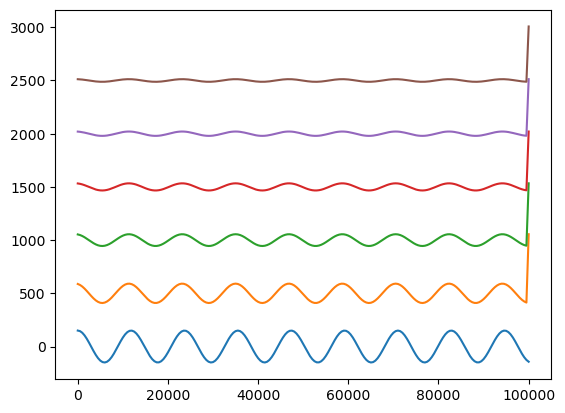

In [232]:
plt.plot(x, omegalist[:201])
plt.plot(x, omegalist[202:403])
plt.plot(x, omegalist[403:604])
plt.plot(x, omegalist[604:805])
plt.plot(x, omegalist[805:1006])
plt.plot(x, omegalist[1006:1207])

### Energy Propagation Upstream

In [237]:
U = 15 #m/s^2
N = 0.1 #1/s
l = N / U
print(l)
k = 0.00015 # controls wavelength
v = np.sqrt(l**2 - k**2)
#mu = np.sqrt(k**2 - l**2)
#print(mu)

h0 = 50000

0.006666666666666667


In [238]:
# The vertical velocity satisfying (1) and the upper and lower boundary conditions is:
def omega7(x, z):
    return U * h0 * k * np.cos(k*x + v*z)

In [239]:
omegalist = []
for i in np.arange(len(z)):
    zz = z[i]
    #print(f'Z -------- Calculating at {zz/1000:0.2}km height')
    for j in np.arange(len(x)):
        xx = x[j]
        #print(f'X -- Calculating for x distance of {xx/1000:0.3}km')
        #print(f'For z={zz/1000}km and x={xx/1000}km')
        #print(f'Omega is {omega(xx, zz):0.4}')
        omegalist.append(omega7(xx, zz)+z[i])

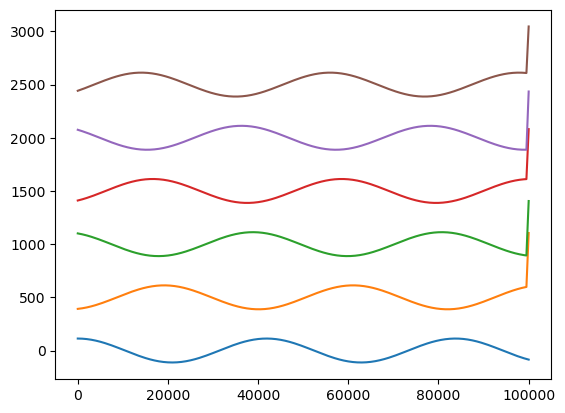

In [240]:
plt.plot(x, omegalist[:201])
plt.plot(x, omegalist[202:403])
plt.plot(x, omegalist[403:604])
plt.plot(x, omegalist[604:805])
plt.plot(x, omegalist[805:1006])
plt.plot(x, omegalist[1006:1207])